In [1]:
import requests
import pandas as pd
import numpy as np
import plotnine as p9

In [82]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
PATH_CSV = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQZ4RZS1YFlaYvzs75NdKzHiU4p0rWT1FIOoo4sPSGmJnPs49BC0rhT8y1NJfJyQF4oCeFH4rx_uy4x/pub?gid=0&single=true&output=csv"

In [111]:
# Download manually curated data

df = pd.read_csv(PATH_CSV,
    thousands=",",
                )
df.head()

,City,Year,2019 Population Estimate\nSource: US Census,Budget: Grand Total,Budget: Police,Source,Source Detailed,Notes
0,Washington,2019.0,705749.0,1.229530e+10,5.527280e+08,https://cfo.dc.gov/sites/default/files/dc/site...,p.194-195\nTable 4A-3,Actual expenditure
1,New York City,2019.0,8336817.0,9.201900e+10,5.976818e+09,police: https://council.nyc.gov/budget/wp-cont...,total: p.4 (actual) / p.2 (listed)\npolice: p....,Actual expenditure
2,Los Angeles,2019.0,3979576.0,1.012599e+10,1.733838e+09,http://cao.lacity.org/budget20-21/2020-21Propo...,total: p.60 (actual) / p.44 (listed)\npolice: ...,Estimated expenditure
3,Chicago,2019.0,2693976.0,8.860000e+09,1.591700e+09,https://www.chicago.gov/content/dam/city/depts...,p.194 (actual) / p.192 (listed),Appropriated budget
4,Houston,2019.0,2320268.0,2.484506e+09,8.707761e+08,total: https://www.houstontx.gov/budget/20buda...,police: p.6 (actual) / p.III- 21 (listed)\ntot...,Estimated expenditure


In [115]:
df.sort_values('2019 Population Estimate\nSource: US Census', ascending=False)['Budget: Police'][0:10].sum()

13498219279.0

In [70]:
# Format
df['Percent_Police'] = df['Budget: Police'] / df['Budget: Grand Total'] * 100

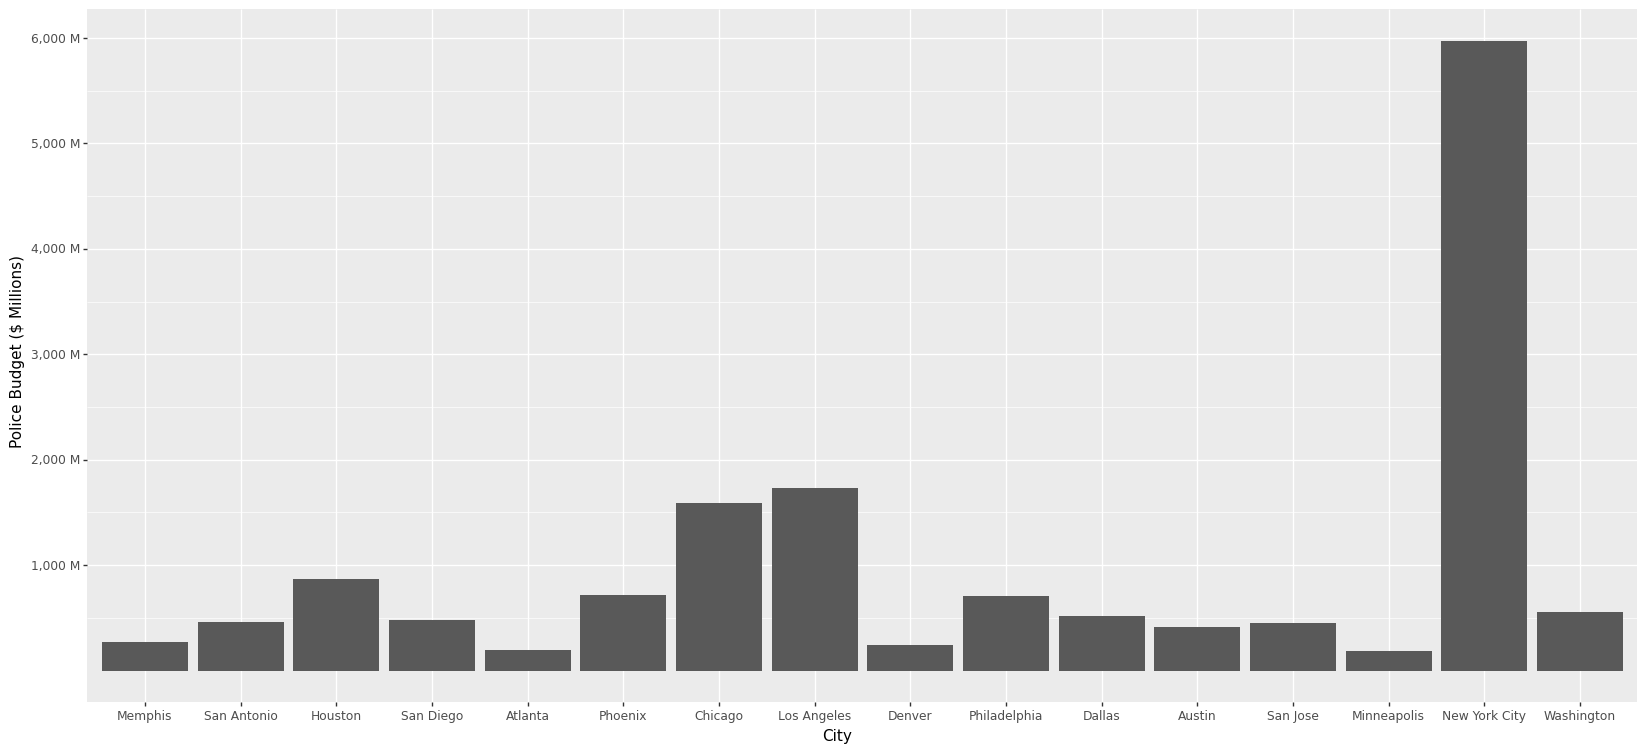

<ggplot: (8773699592180)>

In [110]:
city_order = df.sort_values('Percent_Police', ascending=False)['City']

(p9.ggplot(df)
    + p9.geom_col(p9.aes(x="City", y='Budget: Police'))
    + p9.theme(figure_size=(20,9))
#     + p9.scale_x_discrete(limits=city_order)
    + p9.scale_x_discrete(limits=city_order)
    + p9.scale_y_continuous(
        breaks = [1000000000, 2000000000, 3000000000, 4000000000, 5000000000, 6000000000],
        labels = ["1,000 M", "2,000 M", "3,000 M", "4,000 M", "5,000 M", "6,000 M"]
    )
    + p9.labs(y="Police Budget ($ Millions)")

)

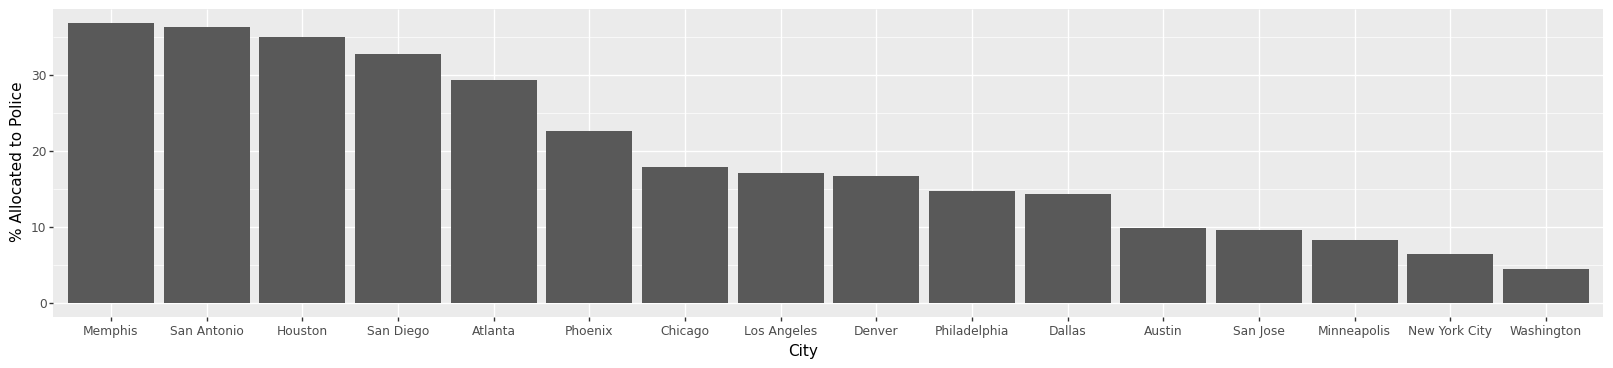

<ggplot: (8773703919866)>

In [95]:
city_order = df.sort_values('Percent_Police', ascending=False)['City']

(p9.ggplot(df)
#     + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
    + p9.theme(figure_size=(20, 4))
    + p9.geom_col(p9.aes(x="City", y='Percent_Police'))
    + p9.scale_x_discrete(limits=city_order) 
    + p9.labs(y="% Allocated to Police")
)